<a href="https://colab.research.google.com/github/sanajajoseph/Deep-Learning-Projects/blob/main/Face_mask_detection_final_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Face Mask Detection**





Import all Dependencies





In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [ ]:
# mounting my Google drive to access files that I have uploaded to my drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
#Reading my image folder

dataset = '/content/drive/MyDrive/archive (1)/data'

In [ ]:
# List files inside 'picture' folder

files = os.listdir(dataset)
print(files)


['without_mask', 'with_mask']


**Data Collection**

In [ ]:
# load the images wearing mask
# make a list of all the filenames in with_mask folder
with_mask_files = os.listdir('/content/drive/MyDrive/archive (1)/data/with_mask')
print(with_mask_files)

['with_mask_3439.jpg', 'with_mask_3441.jpg', 'with_mask_3458.jpg', 'with_mask_3427.jpg', 'with_mask_343.jpg', 'with_mask_3434.jpg', 'with_mask_3462.jpg', 'with_mask_3461.jpg', 'with_mask_3436.jpg', 'with_mask_3438.jpg', 'with_mask_3424.jpg', 'with_mask_3425.jpg', 'with_mask_3429.jpg', 'with_mask_3464.jpg', 'with_mask_3478.jpg', 'with_mask_3465.jpg', 'with_mask_3487.jpg', 'with_mask_3485.jpg', 'with_mask_3473.jpg', 'with_mask_348.jpg', 'with_mask_3493.jpg', 'with_mask_3498.jpg', 'with_mask_3463.jpg', 'with_mask_3501.jpg', 'with_mask_3475.jpg', 'with_mask_3499.jpg', 'with_mask_3469.jpg', 'with_mask_3474.jpg', 'with_mask_3497.jpg', 'with_mask_347.jpg', 'with_mask_3490.jpg', 'with_mask_35.jpg', 'with_mask_3484.jpg', 'with_mask_3500.jpg', 'with_mask_3486.jpg', 'with_mask_3503.jpg', 'with_mask_3494.jpg', 'with_mask_349.jpg', 'with_mask_3488.jpg', 'with_mask_3466.jpg', 'with_mask_3495.jpg', 'with_mask_3468.jpg', 'with_mask_3467.jpg', 'with_mask_3496.jpg', 'with_mask_3477.jpg', 'with_mask_3482

In [ ]:
# first 5 file names
print(with_mask_files[0:5])
# last 5 file names
print(with_mask_files[-5:])

['with_mask_3439.jpg', 'with_mask_3441.jpg', 'with_mask_3458.jpg', 'with_mask_3427.jpg', 'with_mask_343.jpg']
['with_mask_1644.jpg', 'with_mask_1685.jpg', 'with_mask_1641.jpg', 'with_mask_168.jpg', 'with_mask_1688.jpg']


In [ ]:
# load the images without mask
# make a list of all the filenames in without_mask folder
without_mask_files = os.listdir('/content/drive/MyDrive/archive (1)/data/without_mask')

In [ ]:
# first 5 file names
print(without_mask_files[0:5])
# first 5 file names
print(without_mask_files[-5:])

['without_mask_3573.jpg', 'without_mask_3544.jpg', 'without_mask_3579.jpg', 'without_mask_356.jpg', 'without_mask_3535.jpg']
['without_mask_170.jpg', 'without_mask_1666.jpg', 'without_mask_1722.jpg', 'without_mask_1700.jpg', 'without_mask_1661.jpg']


In [ ]:
# Number of images of both type
print("Number of with mask images: ", len(with_mask_files))
print("Number of without mask images: ", len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3838


**Label Data**

In [ ]:
# label dataset with mask as 1
with_mask_labels = [1]*len(with_mask_files)
print(with_mask_labels)
print(len(with_mask_labels))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
# label dataset without mask as 0
without_mask_labels = [0]*len(without_mask_files)
print(without_mask_labels)
print(len(without_mask_labels))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# adding both list together
labels = with_mask_labels + without_mask_labels

print(len(labels)) # totalimages
print(labels[0:5]) # first five
print(labels[-5:]) # last five

7563
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Display Images**

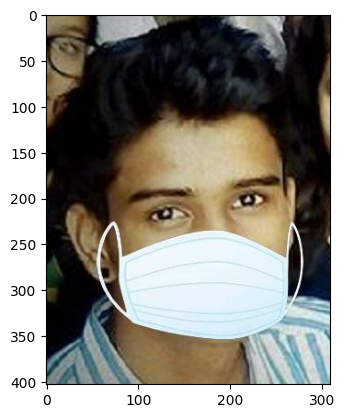

In [ ]:
# display mask images
img = mpimg.imread('/content/drive/MyDrive/archive (1)/data/with_mask/with_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

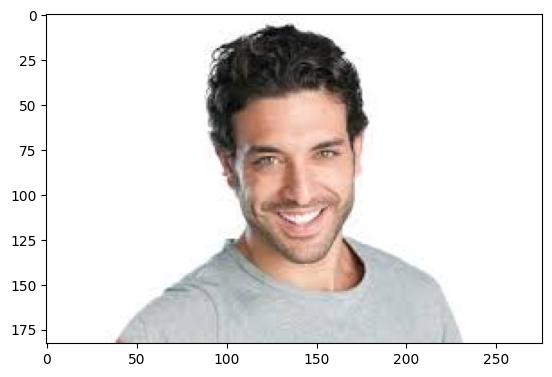

In [ ]:
# display without mask images
img = mpimg.imread('/content/drive/MyDrive/archive (1)/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

In [ ]:
# numpy array of images
data = []

**Resizing all images and saving these images in different folder**

In [ ]:
# Creating directories for resized images

os.mkdir("/content/resized_with_mask0")
os.mkdir("/content/resized_without_mask0")

**Resizing the images**

In [ ]:
# resize with_mask images

import os
from PIL import Image

with_mask_path = "/content/drive/MyDrive/archive (1)/data/with_mask/"
resized_with_mask_folder = "/content/resized_with_mask0/"#saving all the resized images in this folder

# Create the output folder if it doesn't exist
os.makedirs(resized_with_mask_folder, exist_ok=True)

for img_file in os.listdir(with_mask_path):
    img_path = os.path.join(with_mask_path, img_file)
    img = Image.open(img_path)    #Image is the library which we imported from PIL

    # Convert and resize
    img = img.convert("RGB")   #'RGB' is for colored image. (2 coloring formats are there, one is grayscale, 2-"RGB")
    img = img.resize((128, 128))  #128,128 (pixels)are the common dimension, we use in most

    # Save to new path with JPEG format
    new_img_path = os.path.join(resized_with_mask_folder, os.path.splitext(img_file)[0] + ".jpg")
    img.save(new_img_path, "JPEG")

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
# resize without_mask images

without_mask_path = "/content/drive/MyDrive/archive (1)/data/without_mask/"
resized_without_mask_folder = "/content/resized_without_mask0/"

# Create the output folder if it doesn't exist
os.makedirs(resized_without_mask_folder, exist_ok=True)

for img_file in os.listdir(without_mask_path):
    img_path = os.path.join(without_mask_path, img_file)
    img = Image.open(img_path)

    # Convert and resize
    img = img.convert("RGB")
    img = img.resize((128, 128))

    # Save to new path with JPEG format
    new_img_path = os.path.join(resized_without_mask_folder, os.path.splitext(img_file)[0] + ".jpg")
    img.save(new_img_path, "JPEG")


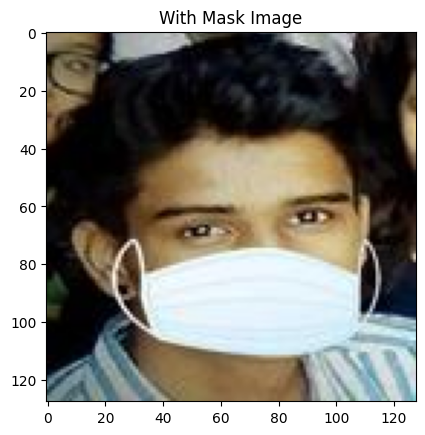

In [ ]:
# displaying with mask image

img = mpimg.imread("/content/resized_with_mask0/with_mask_1000.jpg")
plt.imshow(img)
plt.title("With Mask Image")
plt.show()


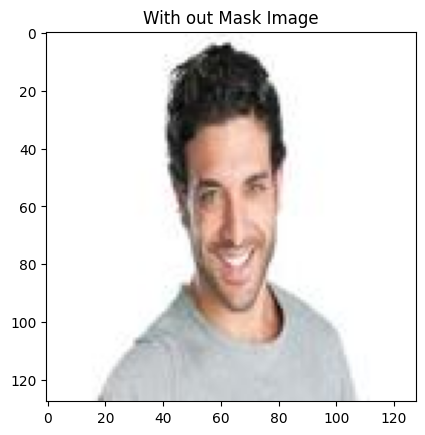

In [ ]:
# displaying with out mask image

img = mpimg.imread("/content/resized_without_mask0/without_mask_1000.jpg")
plt.imshow(img)
plt.title("With out Mask Image")
plt.show()

Next step of data pre-processing will be converting these images into numpy array.. Because computers only understand numerical values

In [ ]:
import glob
# reading with_mask images

imdir = "/content/resized_with_mask0/"
ext = ["png","jpg"]

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

with_mask_images = np.asarray([cv2.imread(file) for file in files])
print(with_mask_images)


[[[[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  [[  3   3   3]
   [  3   3   3]
   [  3   3   3]
   ...
   [  1   1   1]
   [  1   1   1]
   [  1   1   1]]

  ...

  [[ 27  19  19]
   [ 28  20  20]
   [ 29  21  21]
   ...
   [ 23  18  15]
   [ 24  19  16]
   [ 22  17  14]]

  [[ 27  19  19]
   [ 28  20  20]
   [ 29  21  21]
   ...
   [ 25  20  17]
   [ 25  20  17]
   [ 21  16  13]]

  [[ 25  17  17]
   [ 26  18  18]
   [ 27  19  19]
   ...
   [ 26  21  18]
   [ 26  21  18]
   [ 20  15  12]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [ ]:
# reading without_mask images

imdir = "/content/resized_without_mask0/"
ext = ["png","jpg"]

files = []
[files.extend(glob.glob(imdir + '*.' + e)) for e in ext]

without_mask_images = np.asarray([cv2.imread(file) for file in files])
print(without_mask_images)

[[[[240 242 242]
   [240 242 242]
   [241 243 243]
   ...
   [249 249 249]
   [249 249 249]
   [249 249 249]]

  [[240 242 242]
   [241 243 243]
   [242 244 244]
   ...
   [249 249 249]
   [249 249 249]
   [249 249 249]]

  [[241 243 243]
   [242 244 244]
   [243 245 245]
   ...
   [249 249 249]
   [249 249 249]
   [249 249 249]]

  ...

  [[108 103 104]
   [106 101 102]
   [103  98  99]
   ...
   [185 174 184]
   [216 205 215]
   [243 232 242]]

  [[ 94  88  89]
   [ 93  87  88]
   [ 93  87  88]
   ...
   [176 165 175]
   [196 185 195]
   [209 198 208]]

  [[ 85  79  80]
   [ 84  78  79]
   [ 82  76  77]
   ...
   [149 138 148]
   [163 152 162]
   [172 161 171]]]


 [[[147 195 223]
   [144 192 220]
   [150 198 226]
   ...
   [194 237 255]
   [194 234 253]
   [146 186 205]]

  [[153 201 229]
   [150 198 226]
   [156 204 232]
   ...
   [189 232 251]
   [189 229 248]
   [141 181 200]]

  [[157 205 233]
   [153 201 229]
   [148 196 224]
   ...
   [183 226 245]
   [184 224 243]
   [137 177

In [ ]:
print(with_mask_images.shape)
print(without_mask_images.shape)

(3725, 128, 128, 3)
(3838, 128, 128, 3)


**Combining two arrays**

In [ ]:
combined_images = np.concatenate((with_mask_images,without_mask_images))
print(combined_images.shape)

(7563, 128, 128, 3)


array([[[241, 241, 241],
        [242, 242, 242],
        [243, 243, 243],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[241, 241, 241],
        [242, 242, 242],
        [243, 243, 243],
        ...,
        [246, 246, 246],
        [245, 245, 245],
        [245, 245, 245]],

       [[242, 242, 242],
        [243, 243, 243],
        [244, 244, 244],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [245, 245, 245]],

       ...,

       [[ 27,  19,  12],
        [ 28,  20,  13],
        [ 27,  21,  14],
        ...,
        [ 18,  10,  11],
        [ 23,  15,  16],
        [ 33,  25,  26]],

       [[ 28,  19,  10],
        [ 28,  21,  12],
        [ 27,  21,  14],
        ...,
        [ 29,  21,  22],
        [ 27,  19,  20],
        [ 26,  18,  19]],

       [[ 28,  19,   9],
        [ 27,  21,  10],
        [ 29,  21,  14],
        ...,
        [ 19,  11,  12],
        [ 24,  16,  17],
        [ 30,  22,  23]]], dtype=uint8)
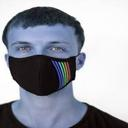

In [ ]:
# print one image data
with_mask_images[3724]

In [ ]:
# convert images and labels into numpy array
X = np.array(with_mask_images)
y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
# shape of data and label
print(X.shape)
print(y.shape)

(3725, 128, 128, 3)
(7563,)


**Split Train and Test data**

In [ ]:
X = []
y = []

# For with_mask images (label 1)
for img_file in os.listdir(with_mask_path):
    img_path = os.path.join(with_mask_path, img_file)
    img = Image.open(img_path).convert("RGB").resize((128, 128))
    X.append(np.array(img))
    y.append(1)  # Label for "with mask"

# For without_mask images (label 0)
for img_file in os.listdir(without_mask_path):
    img_path = os.path.join(without_mask_path, img_file)
    img = Image.open(img_path).convert("RGB").resize((128, 128))
    X.append(np.array(img))
    y.append(0)  # Label for "without mask"


In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
# print the shape of features
X = np.array(X)
X_train = np.array(X_train)
X_test = np.array(X_test)

print(X.shape, X_train.shape, X_test.shape)

(7563, 128, 128, 3) (6050, 128, 128, 3) (1513, 128, 128, 3)


6050--> (80% of images is Training images),

1513-->(20% of images is testing images).

**Data Scaling**

In [ ]:
# scaling data between 0 to 1
# # Standardizing the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255
print(X_train_scaled)

[[[[0.52156863 0.60392157 0.77647059]
   [0.5372549  0.61568627 0.78431373]
   [0.58431373 0.65882353 0.81960784]
   ...
   [0.58823529 0.45490196 0.43529412]
   [0.63529412 0.52156863 0.49411765]
   [0.68627451 0.59607843 0.55294118]]

  [[0.52156863 0.60392157 0.78039216]
   [0.5372549  0.61568627 0.78431373]
   [0.58431373 0.65882353 0.81960784]
   ...
   [0.5372549  0.40392157 0.38823529]
   [0.56078431 0.44313725 0.41568627]
   [0.64313725 0.54901961 0.51372549]]

  [[0.5254902  0.60784314 0.78039216]
   [0.5372549  0.61960784 0.78431373]
   [0.58823529 0.6627451  0.82352941]
   ...
   [0.49803922 0.36470588 0.34901961]
   [0.52156863 0.40784314 0.38431373]
   [0.65490196 0.55686275 0.52941176]]

  ...

  [[0.14509804 0.15686275 0.15294118]
   [0.11764706 0.12156863 0.12156863]
   [0.03137255 0.02745098 0.02745098]
   ...
   [0.89411765 0.78431373 0.74509804]
   [0.89411765 0.78431373 0.76078431]
   [0.8627451  0.75294118 0.7372549 ]]

  [[0.19607843 0.20392157 0.2       ]
   [0.1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[253, 253, 251],
        [253, 253, 251],
        [253, 253, 251],
        ...,
        [248, 252, 251],
        [251, 254, 252],
        [251, 255, 252]],

       [[253, 253, 251],
        [253, 253, 251],
        [253, 253, 251],
        ...,
        [250, 255, 253],
        [248, 254, 249],
        [245, 252, 245]],

       [[253, 253, 251],
        [253, 253, 251],
        [253, 253, 251],
        ...,
        [247, 253, 250],
        [249, 254, 249],
        [244, 251, 243]]], dtype=uint8)
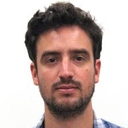

In [ ]:
# before scaling
X_train[2]

In [ ]:
# after scaling
X_train_scaled[2]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.99215686, 0.99215686, 0.98431373],
        [0.99215686, 0.99215686, 0.98431373],
        [0.99215686, 0

**Model Building with Convolutional Neural Network**

In [ ]:
# start creating model using CNN
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="sigmoid"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,400,706 (28.23 MB)

 Trainable params: 7,400,706 (28.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  #optimizer is deriving the optimized parameter in the model

In [ ]:
# model training  or fit the model

X_train_scaled = np.array(X_train_scaled)
y_train = np.array(y_train)

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=5)   #training the model for get better accuracy we are standardizing the data
                                        #epoch is how many times the model has to go through data

Epoch 1/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 143s 819ms/step - accuracy: 0.6938 - loss: 0.7706 - val_accuracy: 0.9025 - val_loss: 0.2640
Epoch 2/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 140s 810ms/step - accuracy: 0.8756 - loss: 0.3046 - val_accuracy: 0.9273 - val_loss: 0.1858
Epoch 3/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 140s 798ms/step - accuracy: 0.8974 - loss: 0.2630 - val_accuracy: 0.9339 - val_loss: 0.1790
Epoch 4/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 141s 825ms/step - accuracy: 0.9279 - loss: 0.1962 - val_accuracy: 0.9273 - val_loss: 0.1766
Epoch 5/5
171/171 ━━━━━━━━━━━━━━━━━━━━ 136s 794ms/step - accuracy: 0.9306 - loss: 0.1788 - val_accuracy: 0.9421 - val_loss: 0.1577


**Model Evaluation**

In [ ]:
# Evaluating for test data
# loss and accuracy

X_test_scaled = np.array(X_test_scaled)
y_test = np.array(y_test)

loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Test data loss:",loss)
print('Test Accuracy:', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.9357 - loss: 0.1666
Test data loss: 0.16921879351139069
Test Accuracy: 0.932584285736084


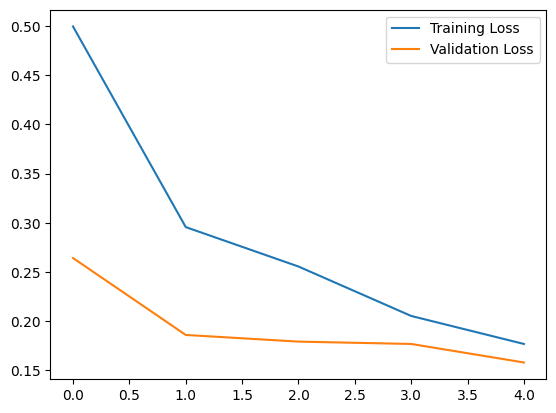

In [ ]:
# Plot loss value
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.show()

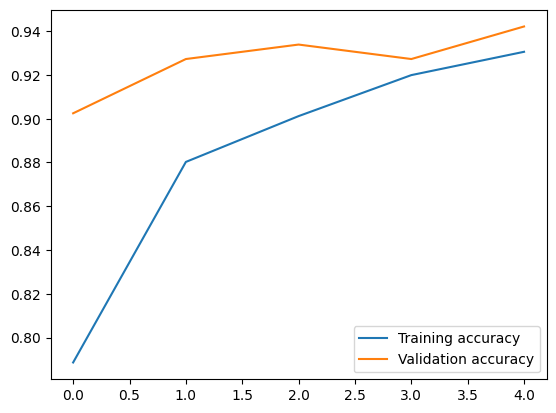

In [ ]:
# Plot accuracy value
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.show()

**Building a Predictive System**

Path of the image to be predicted: /content/with_out_mask.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
[[0.69933116 0.2292193 ]]
The person is not wearing mask.


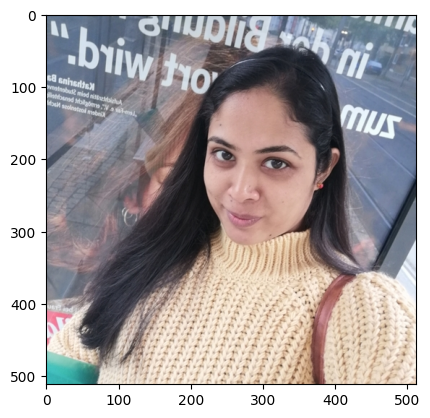

In [ ]:
# take image path
input_image_path = input("Path of the image to be predicted: ")
# load that image
input_image = mpimg.imread(input_image_path)
# show image
plt.imshow(input_image)
# preprocess image
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# predict
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

# take maximum probability
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print("The person is wearing mask.")
else:
    print("The person is not wearing mask.")

Path of the image to be predicted: /content/with_mask_0002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.0685878  0.99900913]]
The person is wearing mask.


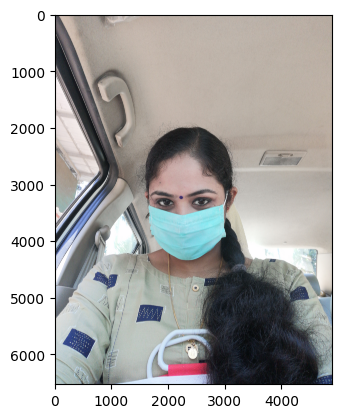

In [ ]:
# take image path
input_image_path = input("Path of the image to be predicted: ")
# load that image
input_image = mpimg.imread(input_image_path)
# show image
plt.imshow(input_image)
# preprocess image
input_image_resized = cv2.resize(input_image, (128, 128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# predict
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)

# take maximum probability
input_pred_label = np.argmax(input_prediction)

if input_pred_label == 1:
    print("The person is wearing mask.")
else:
    print("The person is not wearing mask.")